<a href="https://colab.research.google.com/github/ValeriaYashan/analisis_datos/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving netflix1.csv to netflix1.csv


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


NETFLIX

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import files
import pandas as pd

# Cargar el archivo
uploaded = files.upload()

# Obtener el nombre del archivo cargado
archivo_cargado = list(uploaded.keys())[0]

# Leer el DataFrame desde el archivo cargado
df = pd.read_csv(archivo_cargado)

# Mostrar las primeras filas del DataFrame para verificar
df.head()

Saving netflix1.csv to netflix1 (1).csv


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [10]:
# Exploración básica de datos
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
# Contar valores nulos por columna
valores_nulos = df.isnull().sum()

# Imprimir la cantidad de valores nulos por columna
print(valores_nulos)

# Eliminar filas con valores nulos
df = df.dropna()

# Verificar que no haya más valores nulos después de la eliminación
print(df.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [12]:
# Contar valores incompletos por columna
valores_incompletos = df[df == ""].count()

# Imprimir la cantidad de valores incompletos por columna
print(valores_incompletos)

# Reemplazar valores incompletos con NaN por un valor específico, por ejemplo, "No disponible"
df.replace("", "No disponible", inplace=True)

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [13]:
# Eliminar columnas que no aportan información (por ejemplo, "show_id" y "director")
columnas_a_eliminar = ["show_id", "director"]
df = df.drop(columnas_a_eliminar, axis=1)

In [14]:
# Verificar el tipo de dato de la columna "release_year"
print(df["release_year"].dtype)

# Convertir la columna "release_year" a tipo integer
df["release_year"] = df["release_year"].astype(int)

int64


In [15]:
# Crear una nueva columna con el primer valor de la columna "listed_in"
df["categoria_principal"] = df["listed_in"].str.split(", ").str[0]

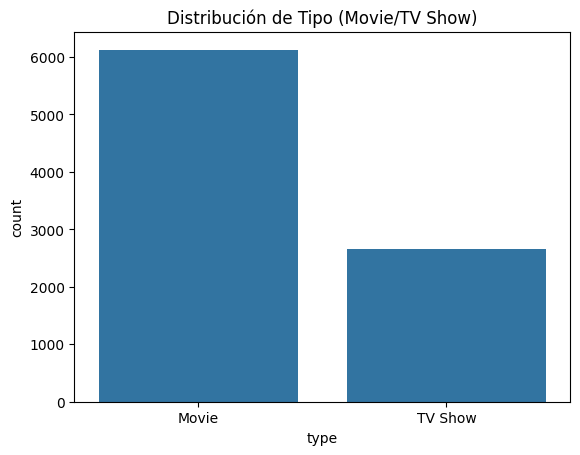

In [16]:
# Visualización de datos
sns.countplot(x='type', data=df)
plt.title('Distribución de Tipo (Movie/TV Show)')
plt.show()

In [18]:
# Limpiar la columna 'rating' y convertirla a un formato numérico
df['rating'] = df['rating'].str.extract('(\d+)')  # Extraer solo los dígitos
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')  # Convertir a tipo numérico, manejar errores como NaN

# Calcular la media de la columna 'rating'
media_rating = df['rating'].mean()
print(f"La media de ratings es: {media_rating}")

La media de ratings es: 13.045165607226497


In [19]:
# Filtrado de datos
peliculas_lanzadas_despues_2020 = df[df['release_year'] > 2020]
print(peliculas_lanzadas_despues_2020)

         type                             title         country  date_added  \
1     TV Show                         Ganglands          France   9/24/2021   
2     TV Show                     Midnight Mass   United States   9/24/2021   
3       Movie  Confessions of an Invisible Girl          Brazil   9/22/2021   
5     TV Show     The Great British Baking Show  United Kingdom   9/24/2021   
6       Movie                      The Starling   United States   9/24/2021   
...       ...                               ...             ...         ...   
6920  TV Show                           Monarca          Mexico    1/1/2021   
6922    Movie      The Minimalists: Less Is Now   United States    1/1/2021   
6948  TV Show                             Hilda  United Kingdom  12/14/2020   
6992  TV Show                      Polly Pocket          Canada  11/15/2020   
7355  TV Show                     Love Is Blind   United States   2/13/2020   

      release_year  rating   duration  \
1         

In [20]:
# Manipulación de fechas
df['date_added'] = pd.to_datetime(df['date_added'])

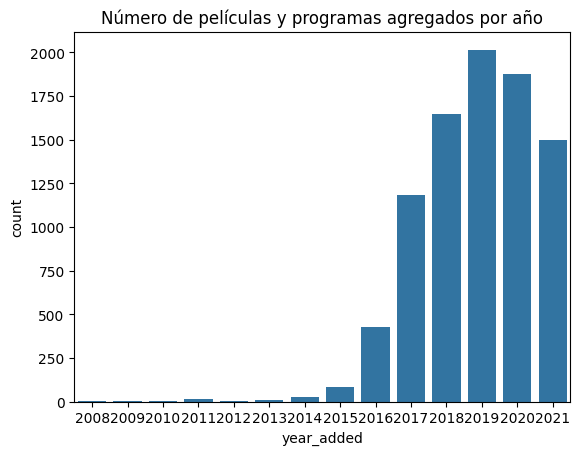

In [21]:
# Convertir la columna 'date_added' a tipo datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Visualizar tendencias a lo largo del tiempo
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Visualización de películas y programas agregados por año
sns.countplot(x='year_added', data=df)
plt.title('Número de películas y programas agregados por año')
plt.show()

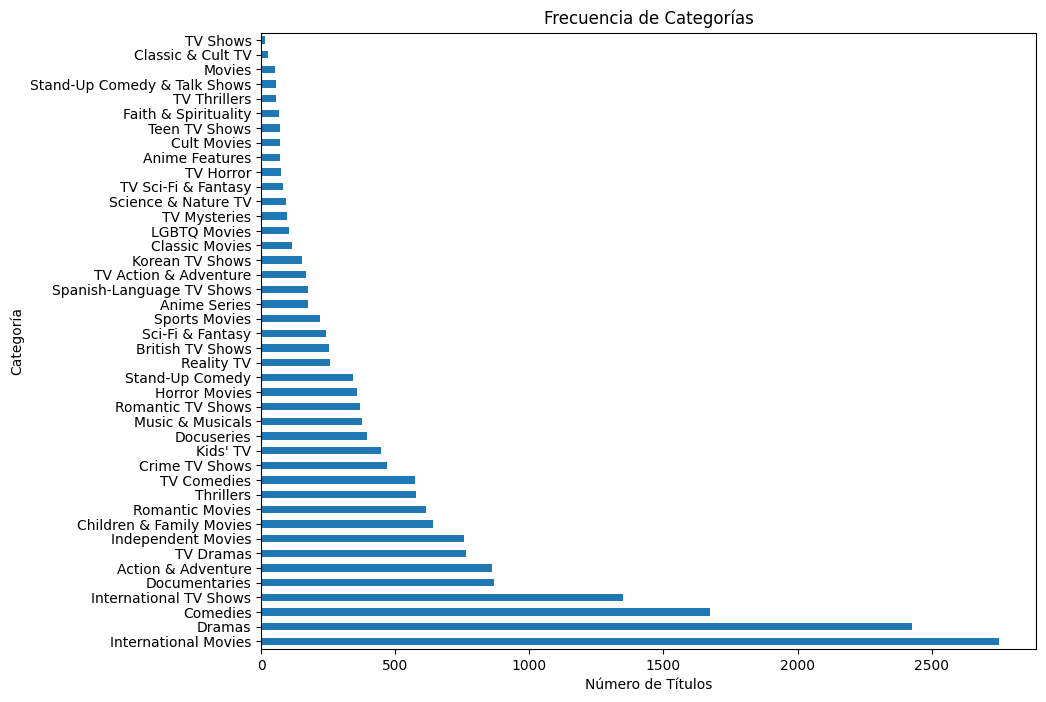

In [22]:
# Contar las frecuencias de cada categoría
categorias_frecuencia = df['listed_in'].str.split(', ').explode().value_counts()

# Visualización de las categorías más comunes
categorias_frecuencia.plot(kind='barh', figsize=(10, 8))
plt.title('Frecuencia de Categorías')
plt.xlabel('Número de Títulos')
plt.ylabel('Categoría')
plt.show()

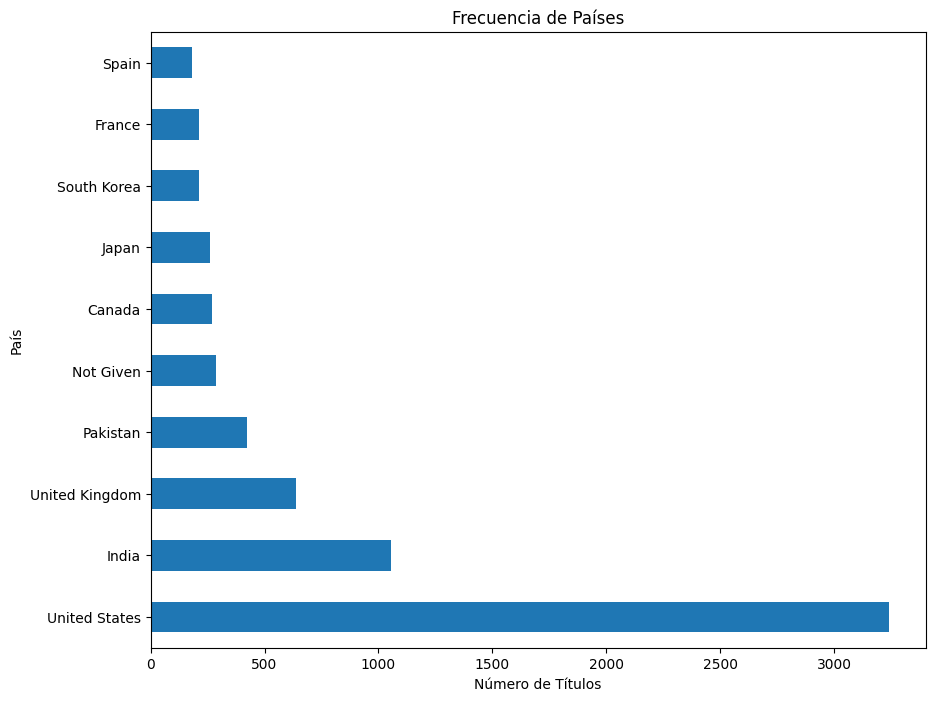

In [23]:
# Contar las frecuencias de cada país
paises_frecuencia = df['country'].value_counts()

# Visualización de los países más comunes
paises_frecuencia.head(10).plot(kind='barh', figsize=(10, 8))
plt.title('Frecuencia de Países')
plt.xlabel('Número de Títulos')
plt.ylabel('País')
plt.show()

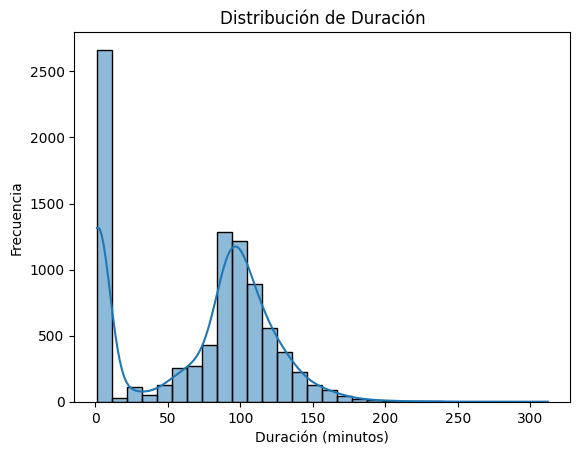

In [24]:
# Convertir la duración a minutos
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

# Visualización de la distribución de duraciones
sns.histplot(df['duration'], bins=30, kde=True)
plt.title('Distribución de Duración')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()

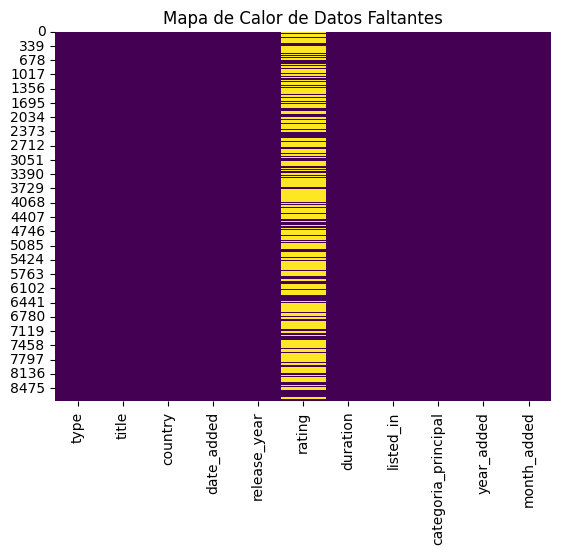

In [25]:
# Mapa de calor de datos faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes')
plt.show()

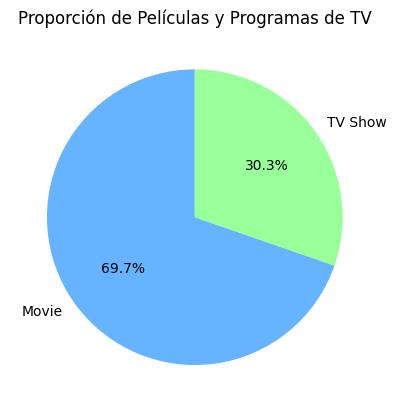

In [26]:
# Crear un diagrama de pastel para tipos de contenido
conteo_tipos_contenido = df['type'].value_counts()
plt.pie(conteo_tipos_contenido, labels=conteo_tipos_contenido.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99'])
plt.title('Proporción de Películas y Programas de TV')
plt.show()

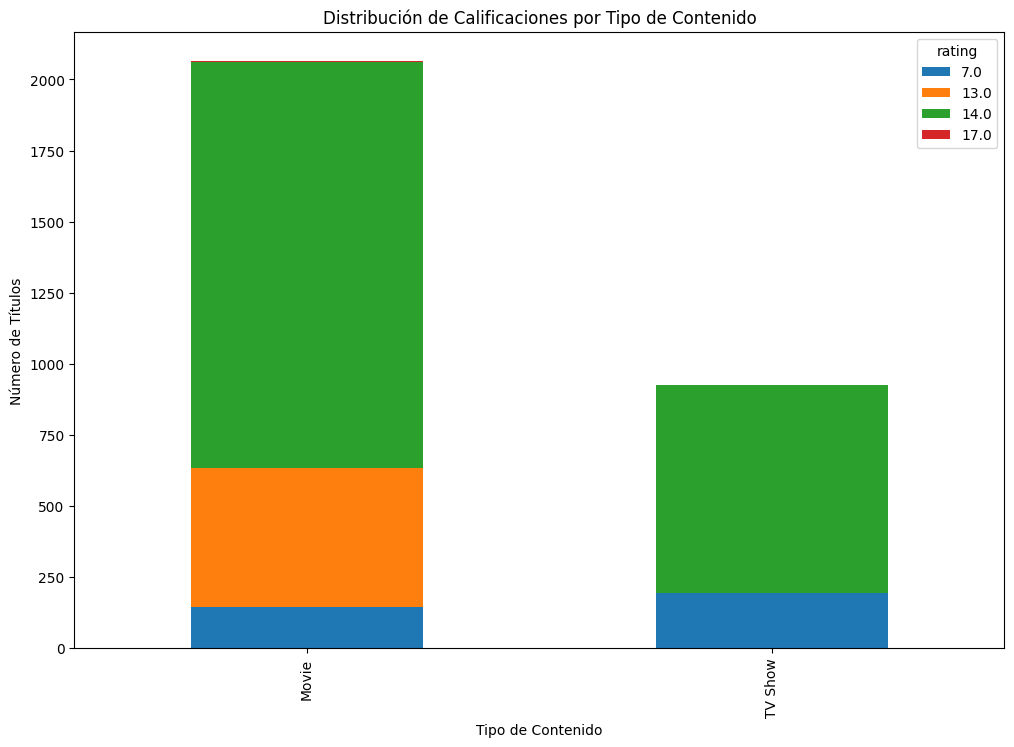

In [27]:
# Gráfico de barras apiladas para calificaciones por tipo
ratings_por_tipo = df.groupby(['type', 'rating']).size().unstack()
ratings_por_tipo.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribución de Calificaciones por Tipo de Contenido')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Número de Títulos')
plt.show()

<ipython-input-28-648cfefc4bc3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y='duration', data=df, palette='muted')


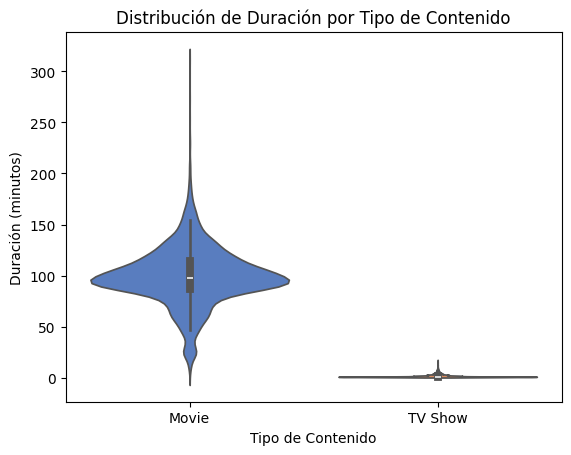

In [28]:
# Diagrama de violín para duración de películas y programas de TV
sns.violinplot(x='type', y='duration', data=df, palette='muted')
plt.title('Distribución de Duración por Tipo de Contenido')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Duración (minutos)')
plt.show()

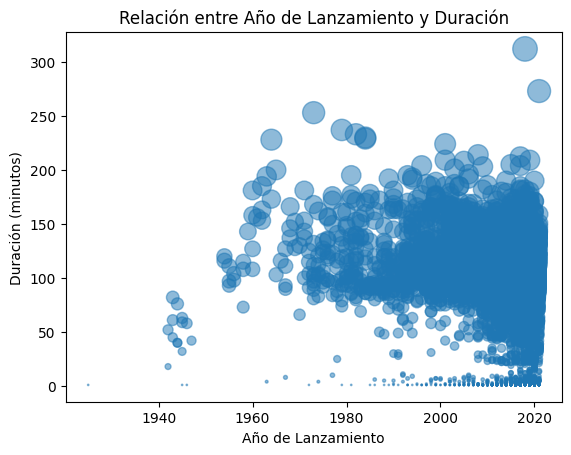

In [29]:
# Gráfico de burbujas para relación entre año de lanzamiento y duración
plt.scatter(x='release_year', y='duration', s='duration', data=df, alpha=0.5)
plt.title('Relación entre Año de Lanzamiento y Duración')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Duración (minutos)')
plt.show()

In [31]:
print(df.head())

      type                             title        country date_added  \
0    Movie              Dick Johnson Is Dead  United States 2021-09-25   
1  TV Show                         Ganglands         France 2021-09-24   
2  TV Show                     Midnight Mass  United States 2021-09-24   
3    Movie  Confessions of an Invisible Girl         Brazil 2021-09-22   
4    Movie                           Sankofa  United States 2021-09-24   

   release_year  rating  duration  \
0          2020    13.0      90.0   
1          2021     NaN       1.0   
2          2021     NaN       1.0   
3          2021     NaN      91.0   
4          1993     NaN     125.0   

                                           listed_in  \
0                                      Documentaries   
1  Crime TV Shows, International TV Shows, TV Act...   
2                 TV Dramas, TV Horror, TV Mysteries   
3                 Children & Family Movies, Comedies   
4   Dramas, Independent Movies, International Movies

In [36]:
import sqlite3
import pandas as pd

# Convertir todas las columnas a tipo cadena antes de la inserción
df = df.astype(str)

# Conectar a la base de datos (o crearla si no existe)
conexion = sqlite3.connect('netflix_data.db')

# Crear un cursor para ejecutar comandos SQL
cursor = conexion.cursor()

# Eliminar la tabla si ya existe
cursor.execute('DROP TABLE IF EXISTS netflix_data')

# Crear una tabla para almacenar tus datos
cursor.execute('''
    CREATE TABLE netflix_data (
        type TEXT,
        title TEXT,
        country TEXT,
        date_added TEXT,
        release_year INTEGER,
        rating REAL,
        duration REAL,
        listed_in TEXT,
        categoria_principal TEXT,
        year_added INTEGER,
        month_added INTEGER
    )
''')

# Insertar datos en la tabla (asegúrate de adaptar esto según tu DataFrame)
for index, row in df.iterrows():
    cursor.execute('''
        INSERT INTO netflix_data VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (row['type'], row['title'], row['country'], row['date_added'],
          row['release_year'], row['rating'], row['duration'], row['listed_in'],
          row['categoria_principal'], row['year_added'], row['month_added']))

# Confirmar los cambios y cerrar la conexión
conexion.commit()
conexion.close()

In [43]:
# Conectar a la base de datos
conexion = sqlite3.connect('netflix_data.db')

# Crear un cursor para ejecutar comandos SQL
cursor = conexion.cursor()

# Ejemplo: Obtener la cantidad de películas por país
consulta = '''
    SELECT country, COUNT(*) AS movie_count
    FROM netflix_data
    WHERE type = 'Movie'
    GROUP BY country
    ORDER BY movie_count DESC;
'''

# Ejecutar la consulta
cursor.execute(consulta)

# Obtener los resultados
resultados = cursor.fetchall()

# Imprimir los resultados
for resultado in resultados:
    print(resultado)

# Cerrar la conexión
conexion.close()

('United States', 2395)
('India', 976)
('United Kingdom', 387)
('Not Given', 257)
('Canada', 187)
('France', 148)
('Spain', 129)
('Egypt', 109)
('Nigeria', 96)
('Mexico', 90)
('Japan', 87)
('Indonesia', 84)
('Turkey', 82)
('Philippines', 80)
('Germany', 79)
('Hong Kong', 76)
('Pakistan', 71)
('Australia', 61)
('Brazil', 60)
('China', 59)
('Argentina', 56)
('South Korea', 49)
('Italy', 47)
('Thailand', 42)
('South Africa', 35)
('Netherlands', 23)
('Poland', 22)
('Ireland', 22)
('United Arab Emirates', 20)
('Denmark', 19)
('Lebanon', 18)
('Chile', 18)
('Colombia', 17)
('Malaysia', 16)
('Taiwan', 15)
('New Zealand', 15)
('Norway', 12)
('Israel', 12)
('Sweden', 11)
('Singapore', 10)
('Romania', 10)
('Belgium', 9)
('Uruguay', 8)
('Austria', 8)
('Vietnam', 7)
('Switzerland', 7)
('Saudi Arabia', 7)
('Peru', 6)
('Russia', 5)
('Kuwait', 5)
('Hungary', 5)
('Czech Republic', 5)
('Bulgaria', 5)
('Portugal', 4)
('Kenya', 4)
('Ghana', 4)
('Serbia', 3)
('Iceland', 3)
('Finland', 3)
('Bangladesh', 3)


In [45]:
# Conectar a la base de datos
conexion = sqlite3.connect('netflix_data.db')

# Consulta SQL para obtener todas las filas de la tabla
query = 'SELECT * FROM netflix_data'

# Leer los datos en un DataFrame de pandas
df = pd.read_sql(query, conexion)

# Realizar análisis exploratorio de datos con pandas
# Por ejemplo, calcular estadísticas descriptivas
print(df.describe())

# Cerrar la conexión
conexion.close()

       release_year     duration   year_added  month_added
count   8790.000000  8790.000000  8790.000000  8790.000000
mean    2014.183163    69.934471  2018.873606     6.655859
std        8.825466    50.794433     1.573568     3.436103
min     1925.000000     1.000000  2008.000000     1.000000
25%     2013.000000     2.000000  2018.000000     4.000000
50%     2017.000000    88.500000  2019.000000     7.000000
75%     2019.000000   106.000000  2020.000000    10.000000
max     2021.000000   312.000000  2021.000000    12.000000


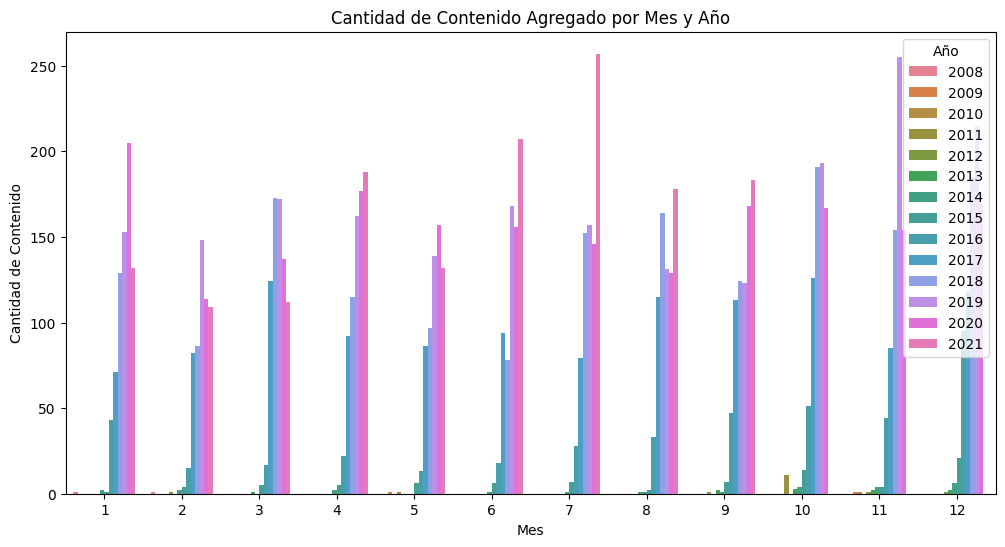

In [48]:
# Ejemplo: Gráfico de barras de la cantidad de contenido agregado por mes
df['date_added'] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year  # Agrega la columna del año
monthly_counts = df.groupby(['year_added', 'month_added']).size().unstack(fill_value=0).stack()

# Selecciona una paleta de colores diferente para cada año
paleta_colores = sns.color_palette("husl", n_colors=df['year_added'].nunique())

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_counts.index.get_level_values('month_added'), y=monthly_counts.values, hue=monthly_counts.index.get_level_values('year_added'), palette=paleta_colores)
plt.title('Cantidad de Contenido Agregado por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Contenido')
plt.legend(title='Año', loc='upper right')
plt.show()

In [54]:


# O llenar NaN con un valor específico, como 0
df['rating'] = df['rating'].fillna(0)

In [55]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Ejemplo: Predicción de la clasificación ('rating') usando Random Forest
features = df[['release_year', 'duration']]
target = df['rating']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión del modelo: {accuracy}')

Precisión del modelo: 0.6257110352673493


In [61]:
# Supongamos que tienes un DataFrame llamado 'new_movie_df' con las características de las nuevas películas

# Obtener las columnas utilizadas para entrenar el modelo
features_used = ['release_year', 'duration']

# Filtrar las columnas relevantes en new_movie_df
new_movie_df = new_movie_df[features_used]

# Rellenar con valores por defecto o ajustar según sea necesario
# new_movie_df['release_year'] = 2022
# new_movie_df['duration'] = 120
# ...

# Realizar predicción con el modelo
prediction = model.predict(new_movie_df)

# Imprimir la clasificación por edades predicha
print(f'La clasificación por edades predicha es: {prediction}')

La clasificación por edades predicha es: [0.]


In [62]:
# Acceder al conjunto de características de entrenamiento
print("Conjunto de características de entrenamiento (X_train):")
print(X_train)

# Acceder al conjunto de etiquetas de entrenamiento
print("\nConjunto de etiquetas de entrenamiento (y_train):")
print(y_train)

Conjunto de características de entrenamiento (X_train):
      release_year  duration
2598          2018     108.0
3202          2017     106.0
6206          2008      87.0
2485          2019      86.0
694           2019     108.0
...            ...       ...
5734          2011     144.0
5191          1973     102.0
5390          2013     119.0
860           1997     103.0
7270          2017       2.0

[7032 rows x 2 columns]

Conjunto de etiquetas de entrenamiento (y_train):
2598    14.0
3202     0.0
6206    13.0
2485     0.0
694     14.0
        ... 
5734     0.0
5191     0.0
5390    14.0
860      0.0
7270     0.0
Name: rating, Length: 7032, dtype: float64


In [63]:
# Obtener predicciones para ciertas películas del conjunto de entrenamiento
sample_movies = X_train.sample(5, random_state=42)  # Seleccionar 5 películas aleatorias
sample_predictions = model.predict(sample_movies)

# Crear un DataFrame para visualizar las predicciones y las clasificaciones reales
predictions_df = pd.DataFrame({
    'Release Year': sample_movies['release_year'],
    'Duration': sample_movies['duration'],
    'Rating (Real)': y_train.loc[sample_movies.index],
    'Rating (Predicted)': sample_predictions
})

print("Predicciones y clasificaciones reales para algunas películas del conjunto de entrenamiento:")
print(predictions_df)

Predicciones y clasificaciones reales para algunas películas del conjunto de entrenamiento:
      Release Year  Duration  Rating (Real)  Rating (Predicted)
6554          2016      53.0            0.0                 0.0
4642          1992     125.0            0.0                 0.0
3744          2017      75.0           13.0                 0.0
4529          2004     100.0            0.0                 0.0
5036          2017      89.0            0.0                 0.0


Estadísticas descriptivas del conjunto de entrenamiento:
       release_year     duration
count   7032.000000  7032.000000
mean    2014.253413    69.784983
std        8.795779    50.885811
min     1925.000000     1.000000
25%     2014.000000     2.000000
50%     2017.000000    88.000000
75%     2019.000000   106.000000
max     2021.000000   312.000000


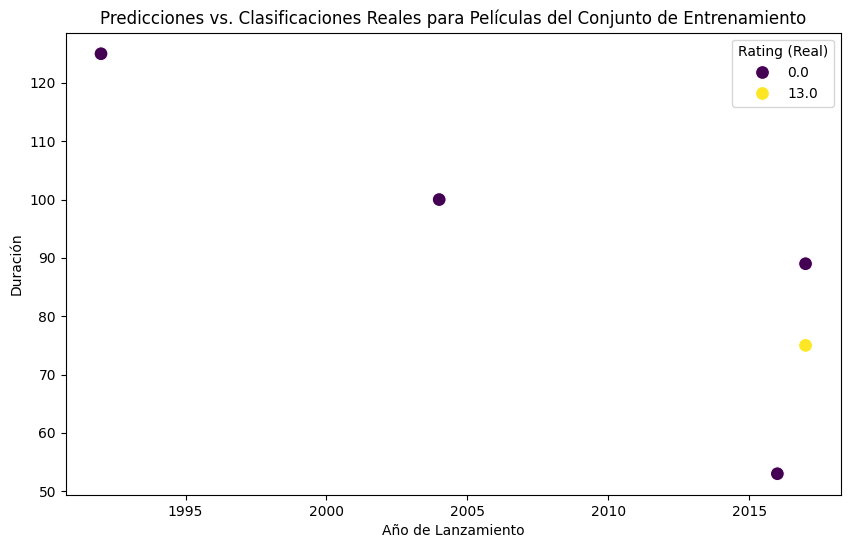

In [64]:
# Análisis exploratorio de datos en el conjunto de entrenamiento
print("Estadísticas descriptivas del conjunto de entrenamiento:")
print(X_train.describe())

# Visualización de las predicciones y clasificaciones reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Release Year', y='Duration', hue='Rating (Real)', data=predictions_df, palette='viridis', s=100)
plt.title('Predicciones vs. Clasificaciones Reales para Películas del Conjunto de Entrenamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Duración')
plt.show()

In [65]:
# Ejemplo: Agregar la columna 'country' al conjunto de características
features = df[['release_year', 'duration', 'country']]

In [66]:
# Ejemplo: Ajuste de la profundidad máxima del árbol
for depth in range(5, 16):
    model = RandomForestClassifier(max_depth=depth)
    # Resto del código de entrenamiento y evaluación

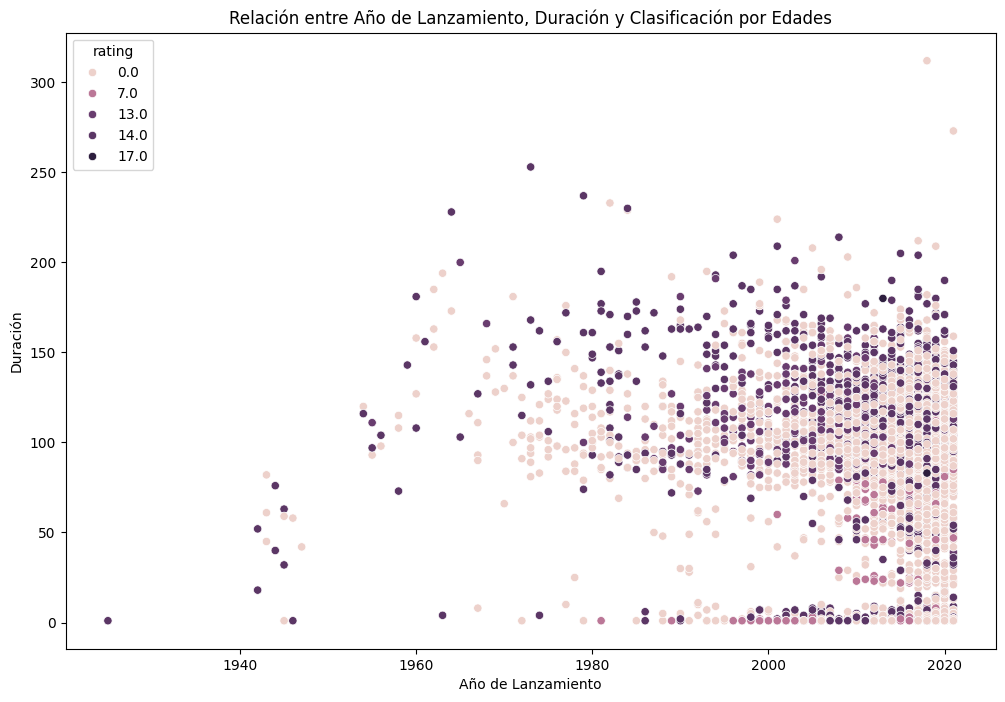

In [68]:
# Ejemplo: Diagrama de dispersión coloreado por clasificación por edades
plt.figure(figsize=(12, 8))
sns.scatterplot(x='release_year', y='duration', hue='rating', data=df)
plt.title('Relación entre Año de Lanzamiento, Duración y Clasificación por Edades')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Duración')
plt.show()

In [69]:
# Ejemplo: Aplicar One-Hot Encoding a la columna 'country'
features = pd.get_dummies(df[['release_year', 'duration', 'country']])

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [71]:
# Ejemplo: Validación cruzada con 5 divisiones
scores = cross_val_score(model, features, target, cv=5)
print(f'Precisión promedio en validación cruzada: {np.mean(scores)}')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Precisión promedio en validación cruzada: 0.6656427758816837


In [72]:
def buscar_pelicula(titulo, df):
    pelicula = df[df['title'] == titulo]
    if not pelicula.empty:
        print(f"La película '{titulo}' está en Netflix.")
    else:
        print(f"La película '{titulo}' no está en Netflix.")

In [75]:
# Ejemplo de uso
buscar_pelicula('Glitch', df)

La película 'Glitch' está en Netflix.
